<a href="https://colab.research.google.com/github/Kibmor/Ramil_Yarullin_data_analyst/blob/main/%D0%AD%D0%9A%D0%9E%D0%9D%D0%9E%D0%9C%D0%95%D0%A2%D0%A0%D0%98%D0%BA%D0%BA%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа по теме «Эконометрическое моделирование». **Регрессионная модель**

**Подключим библиотеки:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from scipy. stats import lognorm
import math
pd.options.display.float_format ='{:,.3f}'.format

ССЫЛКА НА Google Sheets в формате .csv :

https://docs.google.com/spreadsheets/d/1ppN6UrHQDyNH3xlmcQeM0spmkrjfBI4An7RvW2yGUp0/edit?usp=sharing

Выгрузим данные:

In [ ]:
import pandas as pd
from io import BytesIO
import requests
spreadsheet_id = '1ppN6UrHQDyNH3xlmcQeM0spmkrjfBI4An7RvW2yGUp0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data

,2020,"Объем жилищного строительства, всего, млн. руб.","Среднемесяная ЗП за год, в рублях",Потребление электроэнергии на 1000 человек \n(млн.кВт.час),Расходы на охрану окружающей среды в млн. руб.
0,Белгородская область,"1,1",37442,"16204,3",11365
1,Брянская область,"0,4",31946,"3701,8",1981
2,Владимирская область,"0,7",35240,"6899,3",2924
3,Воронежская область,"1,7",36317,"12120,2",6760
4,Ивановская область,"0,3",29083,"3379,7",887
...,...,...,...,...,...
82,Амурская область,"0,2",52430,"8722,2",4768
83,Магаданская область,0,102843,"2793,0",2672
84,Сахалинская область,"0,4",92518,"4814,1",7522
85,Еврейская автономная область,0,46237,"1443,6",713


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   2020                                                       87 non-null     object
 1   Объем жилищного строительства, всего, млн. руб.            87 non-null     object
 2   Среднемесяная ЗП  за год, в рублях                         87 non-null     int64 
 3   Потребление электроэнергии на 1000 человек 
(млн.кВт.час)  87 non-null     object
 4   Расходы на охрану окружающей среды в млн. руб.             87 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.5+ KB


_______________________________________________________________________________________________________________

Установим столбец с названиями субъектов в качестве индекса:

In [ ]:
data=data.set_index('2020')
data

,"Объем жилищного строительства, всего, млн. руб.","Среднемесяная ЗП за год, в рублях",Потребление электроэнергии на 1000 человек \n(млн.кВт.час),Расходы на охрану окружающей среды в млн. руб.
2020,,,,
Белгородская область,"1,1",37442,"16204,3",11365
Брянская область,"0,4",31946,"3701,8",1981
Владимирская область,"0,7",35240,"6899,3",2924
Воронежская область,"1,7",36317,"12120,2",6760
Ивановская область,"0,3",29083,"3379,7",887
...,...,...,...,...
Амурская область,"0,2",52430,"8722,2",4768
Магаданская область,0,102843,"2793,0",2672
Сахалинская область,"0,4",92518,"4814,1",7522


In [ ]:
data.columns=['строительство','ЗП','электричество','РООС']

Заменим ЗАПЯТЫЕ в датафрейме на точки, так как питон воспринимает ТОЧКИ как знак разделения:

In [ ]:
#data['электропотребление']=data['электропотребление'].str.replace(',','.')

In [ ]:
for y in data.index:
  for x in data.columns:
    if str(data.loc[y,x]).find(',')!=-1:
      data.loc[y,x]=str(data.loc[y,x]).replace(',','.')
data

,строительство,ЗП,электричество,РООС
2020,,,,
Белгородская область,1.1,37442,16204.3,11365
Брянская область,0.4,31946,3701.8,1981
Владимирская область,0.7,35240,6899.3,2924
Воронежская область,1.7,36317,12120.2,6760
Ивановская область,0.3,29083,3379.7,887
...,...,...,...,...
Амурская область,0.2,52430,8722.2,4768
Магаданская область,0,102843,2793.0,2672
Сахалинская область,0.4,92518,4814.1,7522


Выведем основную информацию. Тип данных в колонках пока object, что не позволяет работать с данными как с числами.

Измерили количество пропусков в колонках:

In [ ]:
data.isna().sum()

строительство    0
ЗП               0
электричество    0
РООС             0
dtype: int64

In [ ]:
data.columns

Index(['строительство', 'ЗП', 'электричество', 'РООС'], dtype='object')

Однако есть словесные пропуске - строки где напсанно **"нет данных"**

In [ ]:
data=data[data!='нет данных']

Избавились от пропусков:

In [ ]:
data=data.dropna()
data

,строительство,ЗП,электричество,РООС
2020,,,,
Белгородская область,1.1,37442,16204.3,11365
Брянская область,0.4,31946,3701.8,1981
Владимирская область,0.7,35240,6899.3,2924
Воронежская область,1.7,36317,12120.2,6760
Ивановская область,0.3,29083,3379.7,887
...,...,...,...,...
Амурская область,0.2,52430,8722.2,4768
Магаданская область,0,102843,2793.0,2672
Сахалинская область,0.4,92518,4814.1,7522


In [ ]:
print('Количество дубликатов равно',data.duplicated().sum())

Количество дубликатов равно 0


In [ ]:
print('Название наших колонок:',data.columns)
print()
print()

print()
print('Название наших колонок:')
print()

for x in data.columns:
  print('*',x)

Название наших колонок: Index(['строительство', 'ЗП', 'электричество', 'РООС'], dtype='object')



Название наших колонок:

* строительство
* ЗП
* электричество
* РООС


Изменить тип данных с object на float. То есть с общего формата на формат числа с плавающей запятой:

In [ ]:
data=data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, Белгородская область to Чукотский автономный округ
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   строительство  87 non-null     float64
 1   ЗП             87 non-null     float64
 2   электричество  87 non-null     float64
 3   РООС           87 non-null     float64
dtypes: float64(4)
memory usage: 5.5+ KB


_______________________________________________________________________________________________________________

In [ ]:
data.corr()

,строительство,ЗП,электричество,РООС
строительство,1.000,0.091,0.579,0.638
ЗП,0.091,1.000,0.282,0.379
электричество,0.579,0.282,1.000,0.907
РООС,0.638,0.379,0.907,1.000


потребление_электричества -> РОС            



In [ ]:
pok='РООС'

In [ ]:
import statsmodels.api as sm

#define response variable
y = data[pok]

#define predictor variables
x = data[data.columns.drop(pok)]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   РООС   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     173.4
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.21e-35
Time:                        16:31:30   Log-Likelihood:                -849.40
No. Observations:                  87   AIC:                             1707.
Df Residuals:                      83   BIC:                             1717.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3362.4083   1193.619     -2.817

**Выведем основную информацию о таблице:**

In [ ]:
descr=data.describe()
descr.loc['Доверительный интервал снизу',:]=st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))[0]
descr.loc['Доверительный интервал сверху',:]=st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))[1]
descr.loc['Accиметрия',:]=st.skew(data)
descr.loc['Эксцесс',:]=st.kurtosis(data)
for x in data.columns:
  descr.loc['95 перцентиль',x]=np.percentile(data[x],[95])
  descr.loc['99 перцентиль',x]=np.percentile(data[x],[99])
descr=round(descr,3)
descr

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-18-dd03613491e0>:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  descr.loc['Доверительный интервал снизу',:]=st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))[0]
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)

,строительство,ЗП,электричество,РООС
count,87.000,87.000,87.000,87.000
mean,0.982,"45,864.391","13,716.383","9,143.552"
std,1.299,"19,946.510","16,880.592","11,405.846"
min,0.000,"29,083.000",688.600,63.000
25%,0.300,"33,160.500","3,622.900","2,076.500"
50%,0.600,"37,828.000","8,220.800","4,299.000"
75%,1.150,"49,307.500","16,130.300","12,803.500"
max,9.000,"120,641.000","98,401.100","55,690.000"
Доверительный интервал снизу,0.705,"41,613.213","10,118.640","6,712.636"
Доверительный интервал сверху,1.258,"50,115.569","17,314.125","11,574.467"


Построим гистограммы:

<Axes: xlabel='ЗП', ylabel='Count'>

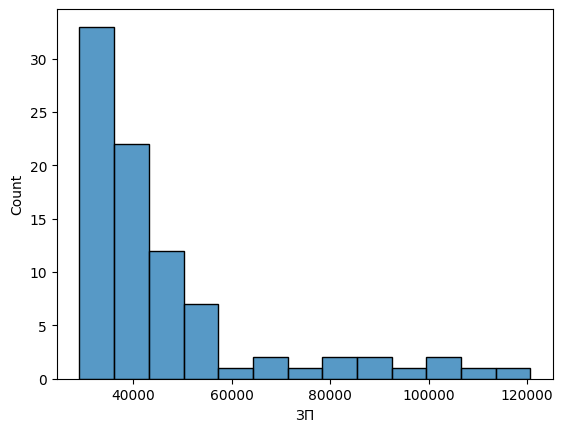

In [ ]:
sns.histplot(data=data, x='ЗП')

In [ ]:
print(i for i in range(0, len(data.columns)) if data.columns[i]==b)

<generator object <genexpr> at 0x7f5fc1184510>


In [ ]:
for b in data.columns:
  print([i for i in range(0, len(data.columns)) if data.columns[i]==b][0])

0
1
2
3


<Figure size 640x480 with 0 Axes>

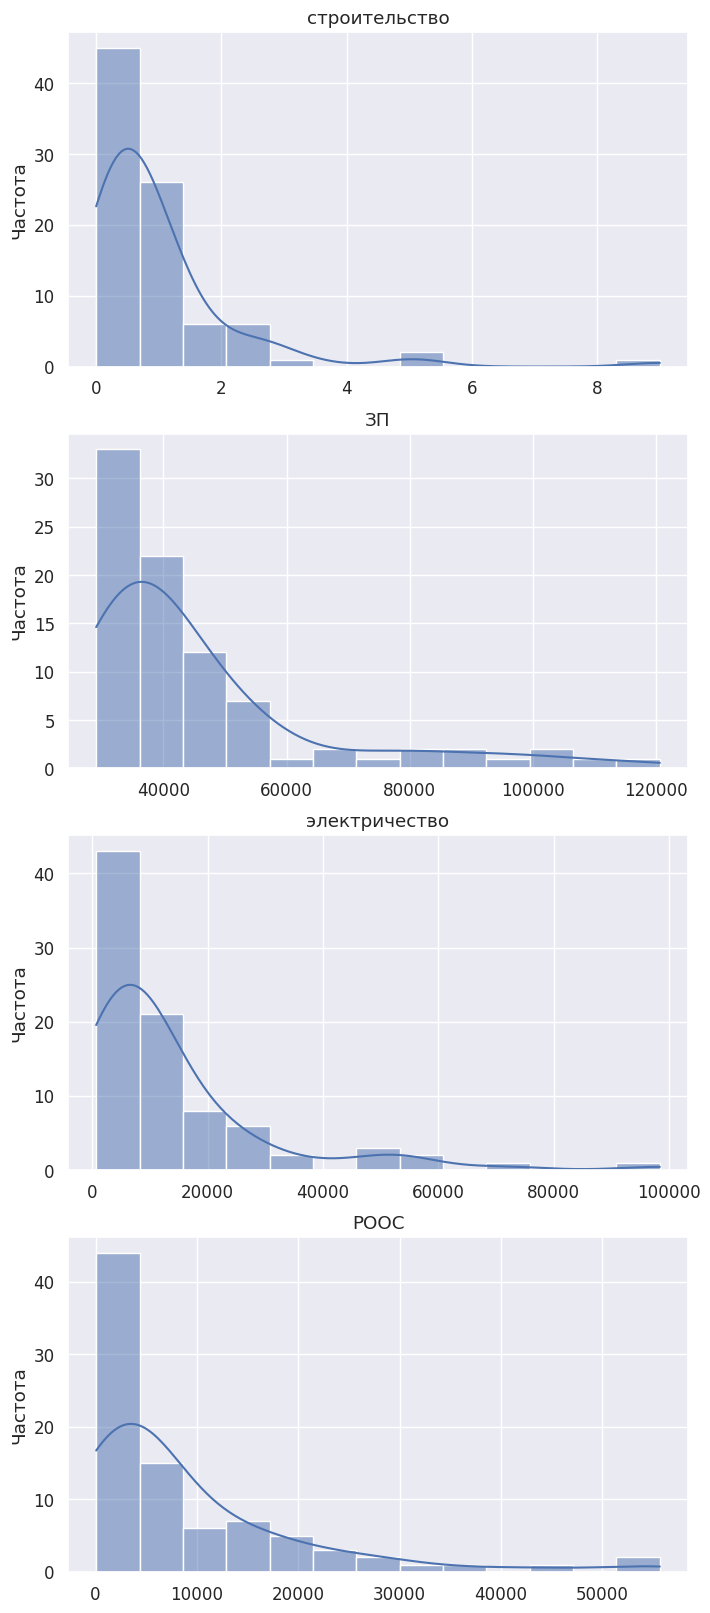

In [ ]:
sns.set_palette('coolwarm') 
sns.set_style('darkgrid') 
sns.set (font_scale= 1.1 )
plt.subplots_adjust(wspace=1.2, hspace=50)
plt.figure(figsize=(8, 20))
for b in data.columns:
  axn=[i for i in range(0, len(data.columns)) if data.columns[i]==b][0]
  sns.histplot(data = data, x=b, bins=13,ax=plt.subplot(4,1,axn+1),kde =True)
  plt.title(b)
  plt.xlabel('')
  plt.ylabel('Частота')

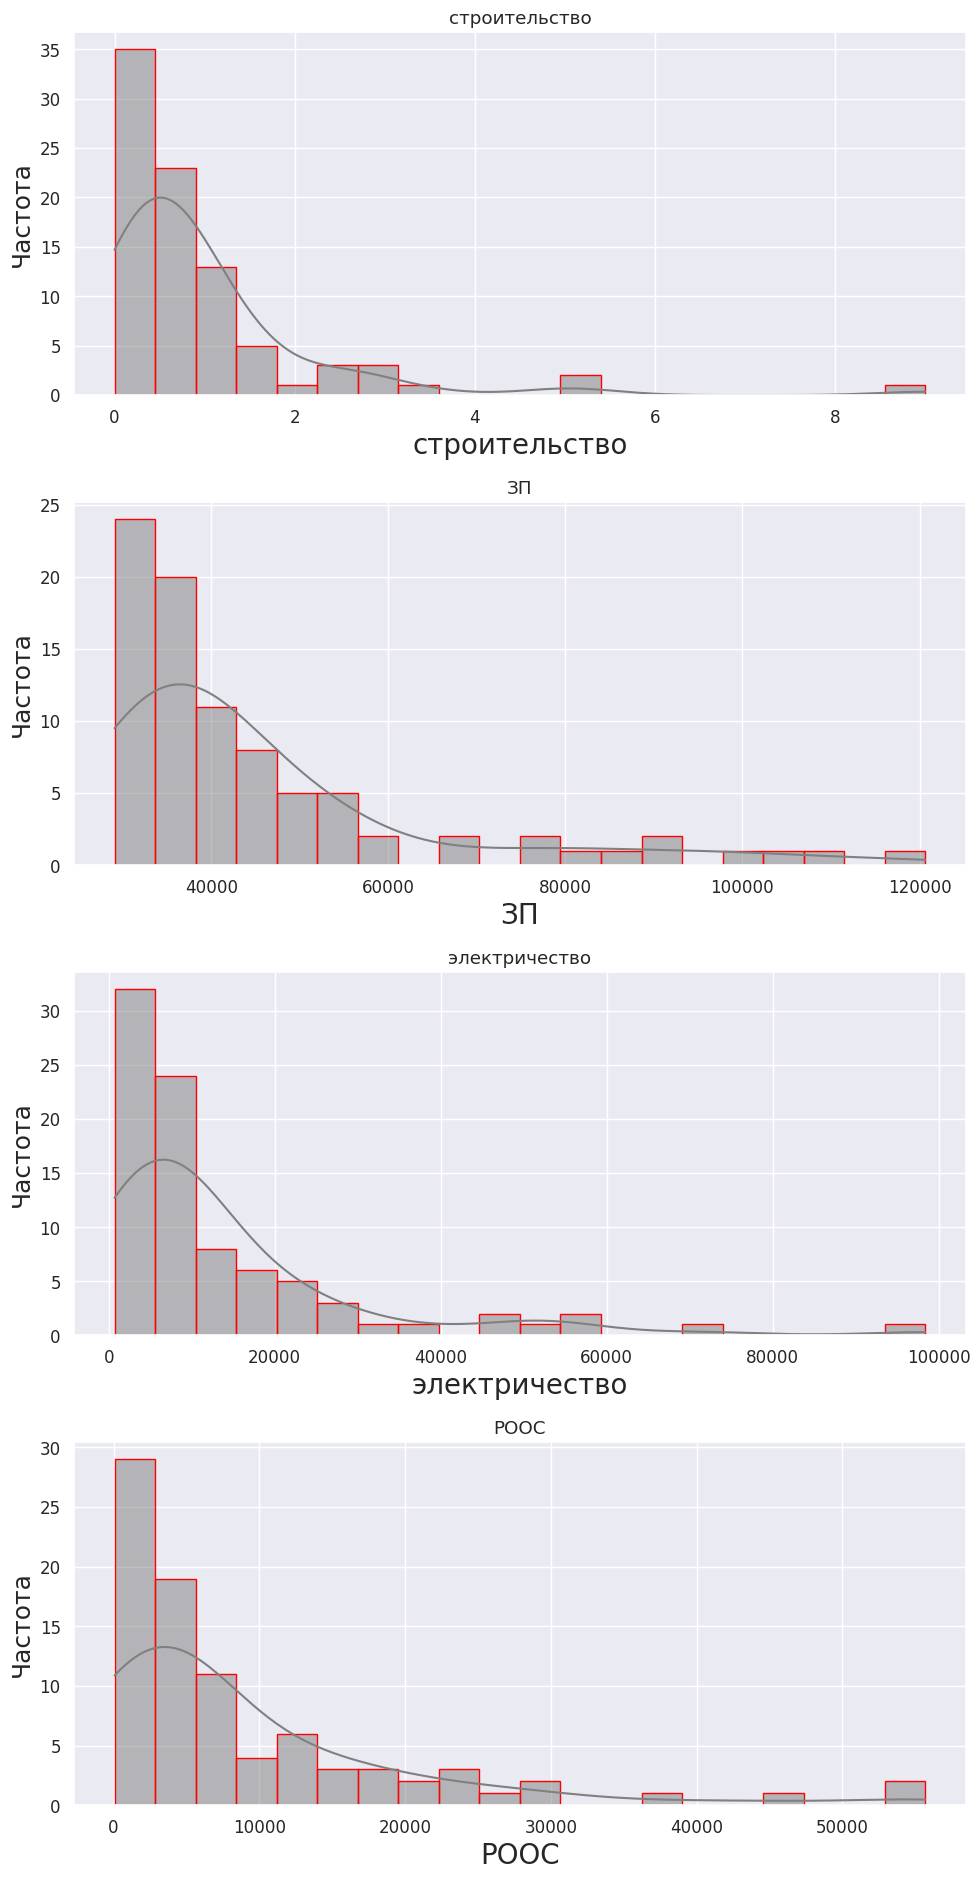

In [ ]:
plt.figure(figsize=(10, 19))
for b in data.columns:
    axn=[i for i in range(0, len(data.columns)) if data.columns[i]==b][0]
    ax=sns.histplot(data = data,x=b, bins=20,ax=plt.subplot(4,1,axn+1),kde =True,color = "grey", ec="red")
    plt.xlabel(b, fontsize= 20 );
    plt.ylabel('Частота', fontsize= 18 );
    plt.title(b, fontsize= 12 )
    plt.tight_layout()
    plt.title(b)

array([[<Axes: title={'center': 'строительство'}>,
        <Axes: title={'center': 'ЗП'}>],
       [<Axes: title={'center': 'электричество'}>,
        <Axes: title={'center': 'РООС'}>]], dtype=object)

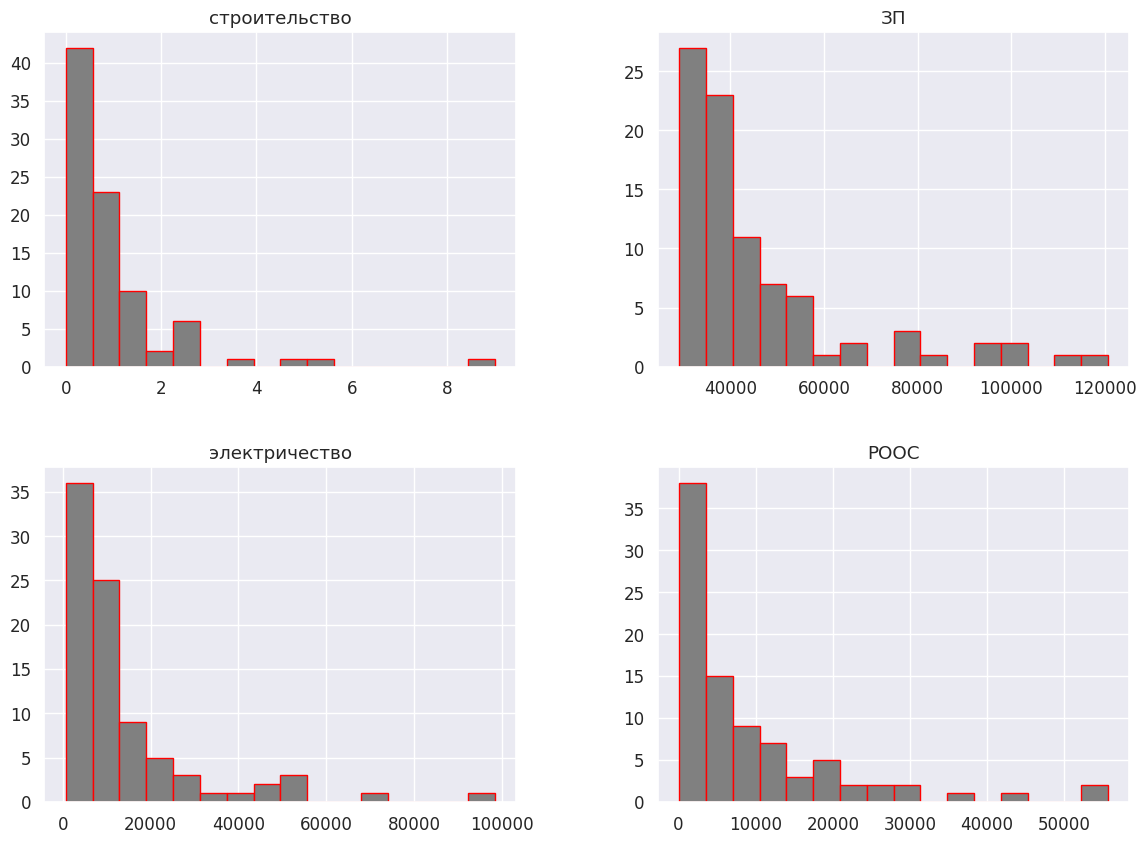

In [ ]:
data.hist(bins=16,figsize=(14,10),color = "grey", ec="red")

In [ ]:
data.columns

Index(['строительство', 'ЗП', 'электричество', 'РООС'], dtype='object')

**А так же построим парные гистогрммы (3 пары - 3 окна кода), показывающее распределения для их сравнения:**

In [ ]:
def double_hist(factor):
  print('Сравнение гистограмм распределения фактора', factor ,'и результирующего показателя',pok,':')
  plt.figure(figsize=(12, 6))
  (sns.histplot(data = data[factor],bins=13,ax=plt.subplot(1,2,1),kde =True,color = 'blue')
      .set(title = factor,  ylabel = 'Количетво'))
  (sns.histplot(data = data[pok],ax=plt.subplot(1,2,2),kde =True,color = 'red')
      .set(title = pok, ylabel = 'Количество'))
  plt.show()

Сравнение гистограмм распределения фактора строительство и результирующего показателя РООС :


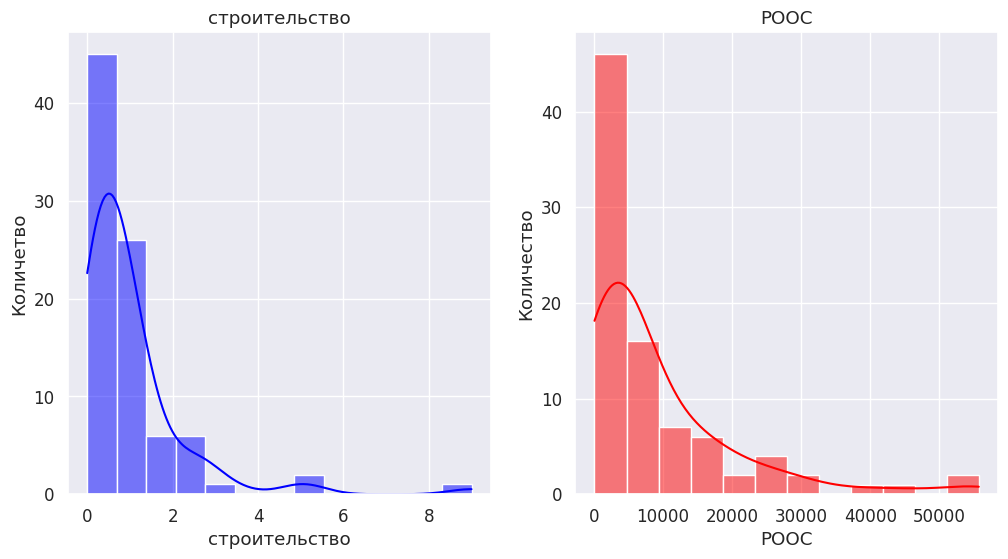

Сравнение гистограмм распределения фактора ЗП и результирующего показателя РООС :


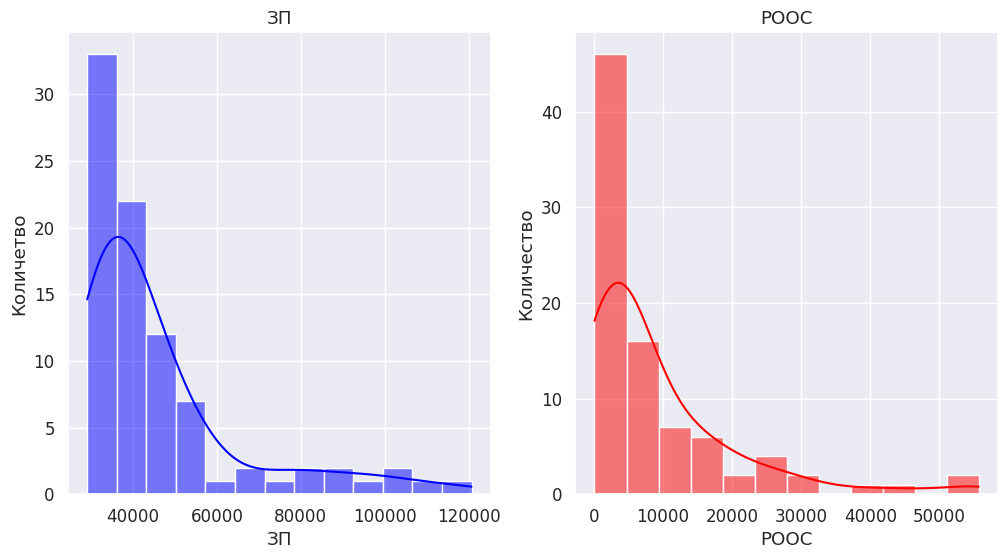

Сравнение гистограмм распределения фактора электричество и результирующего показателя РООС :


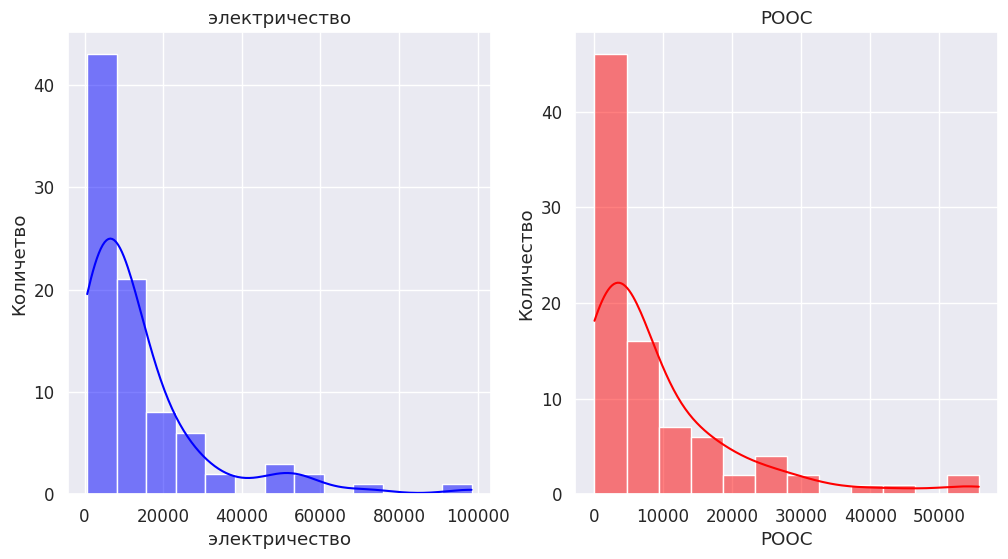

In [ ]:
#@title Текст заголовка по умолчанию
for x in data.columns.drop(pok):
  double_hist(x)

График QQ для набора данных, который соответствует логарифмически нормальному распределению:
Если точки на графике ложатся примерно на прямую диагональную линию, мы обычно предполагаем, что набор данных имеет нормальное распределение.

Однако точки на этом графике явно не попадают на красную линию, поэтому мы не можем предположить, что этот набор данных имеет нормальное распределение.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 640x480 with 0 Axes>

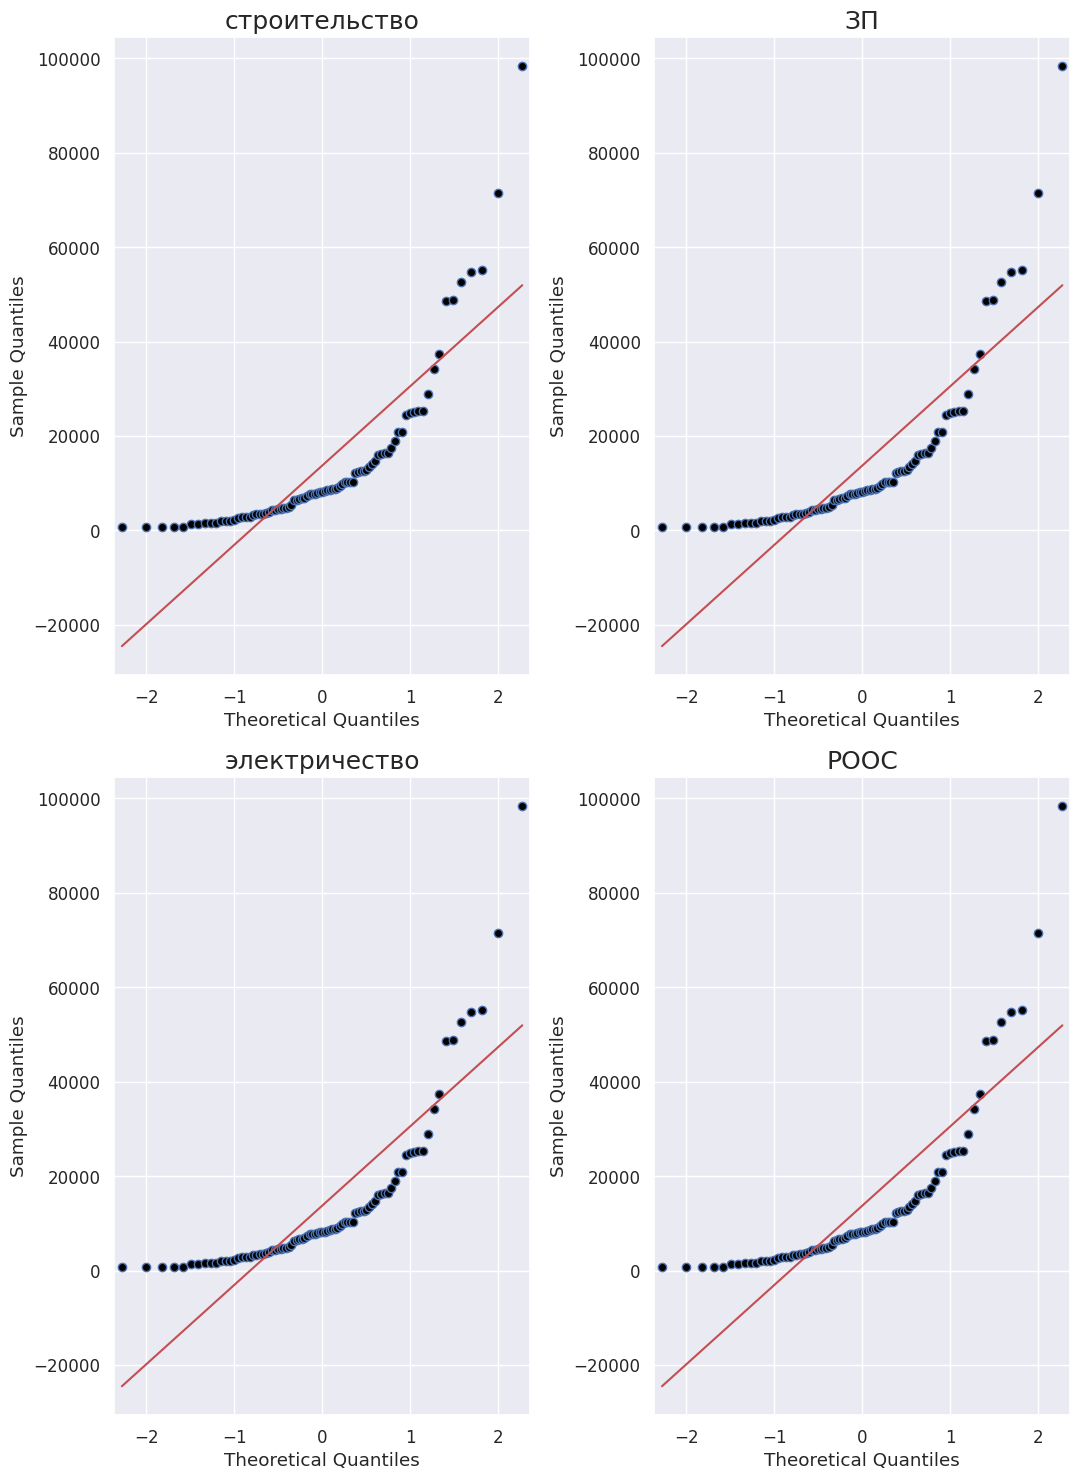

In [ ]:
import scipy.stats as stats
sns.set_palette('coolwarm') 
sns.set_style('darkgrid') 
sns.set (font_scale= 1.1 )
plt.subplots_adjust(wspace=1.2, hspace=50)
plt.figure(figsize=(11, 15))
for b in data.columns:
  axn=[i for i in range(0, len(data.columns)) if data.columns[i]==b][0]
  ax = sm. qqplot(data=data[x],line='s',color='yellow',ax=plt.subplot(2,2,axn+1),markerfacecolor='black',lw=110)
  plt.title(b,fontsize=18)
  plt.tight_layout()

**Построим boxplot'ы или как еще их называют ящики с усами для показателей:**
* Можно отметит высокий выброс в **безработице** - у одного региона безработица около 30%. 
* Есть так же субъекты с такой же проблемой у показателя **бедности**.
* Можно отметить также низкий процент **урбанизации** - 30% и максимально возможное значение 100%.

In [ ]:
data.columns

Index(['строительство', 'ЗП', 'электричество', 'РООС'], dtype='object')

<Figure size 640x480 with 0 Axes>

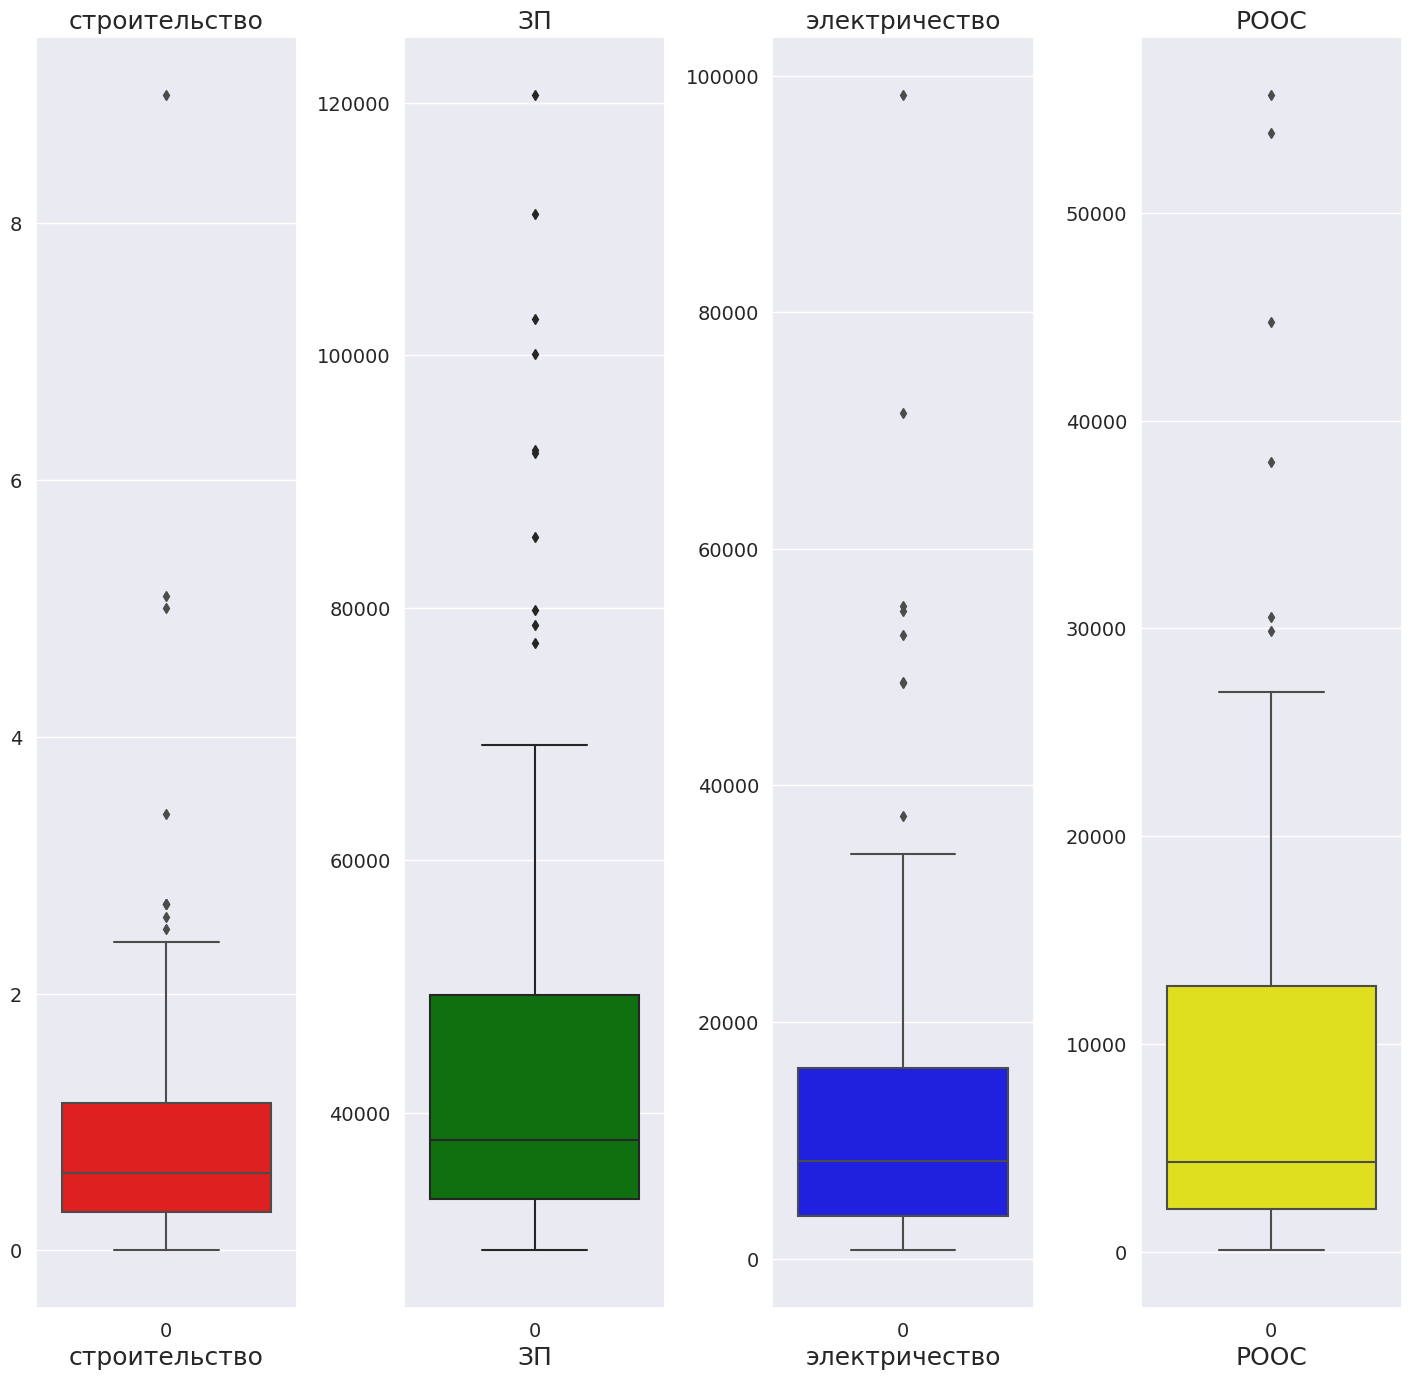

In [ ]:
sns.set_palette('coolwarm') 
sns.set_style('darkgrid') 
sns.set (font_scale= 1.1 )
plt.subplots_adjust(wspace=1.2, hspace=50)
plt.figure(figsize=(18, 14))
col=['red','green','blue','yellow']
for b in data.columns:
  axn=[i for i in range(0, len(data.columns)) if data.columns[i]==b][0]
  ax =sns.boxplot(data = data[b],ax=plt.subplot(1,5,axn+1),color=col[axn])
  plt.title(b,fontsize=18)
  plt.xlabel(b,fontsize=18)
  plt.tick_params ( labelsize= 14 ) 
  plt.tight_layout()

<Figure size 640x480 with 0 Axes>

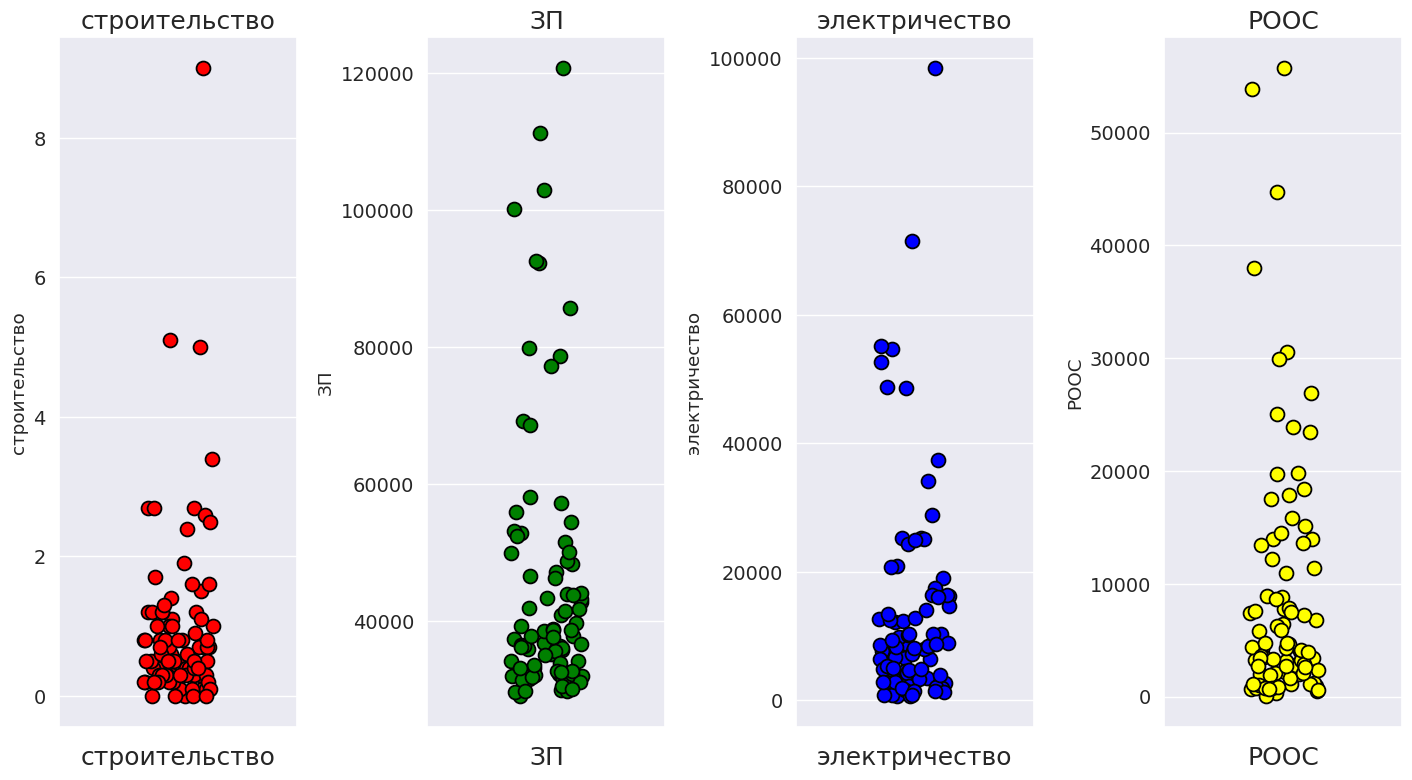

In [ ]:
sns.set_palette('coolwarm') 
sns.set_style('darkgrid') 
sns.set (font_scale= 1.1 )
plt.subplots_adjust(wspace=1.2, hspace=50)
plt.figure(figsize=(18, 8))
col=['red','green','blue','yellow']
for b in data.columns:
  axn=[i for i in range(0, len(data.columns)) if data.columns[i]==b][0]
  ax =sns.stripplot(data = data[b],ax=plt.subplot(1,5,axn+1),color=col[axn], s=10 ,jitter=0.15 ,edgecolor='black',linewidth=1.3)
  plt.title(b,fontsize=18)
  plt.xlabel(b,fontsize=18)
  plt.tick_params ( labelsize= 14 ) 
  plt.tight_layout()

sns.set_palette('gist_rainbow') 

sns.set_style('white') 

sns.set_rc={' axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen '}

sns.set (font_scale= 1 )

plt.figure(figsize=(18, 12))

(sns.boxplot(data = data['рождаемость'],ax=plt.subplot(1,5,1),color='green')
    .set(title = 'рождаемость', xlabel = 'рождаемость'))

(sns.boxplot(data = data['ЗП'],ax=plt.subplot(1,5,2),color='yellow')
    .set(title = 'ЗП', xlabel = 'ЗП'))

(sns.boxplot(data = data['смертность'],ax=plt.subplot(1,5,3),color='red')
    .set(title = 'смертность', xlabel = 'смертность'))

(sns.boxplot(data = data['%_медицины'],ax=plt.subplot(1,5,4),color='orange')
    .set(title = '%_медицины', xlabel = '%_медицины'))

(sns.boxplot(data = data['ОПЖ'],ax=plt.subplot(1,5,5),color='brown')
    .set(title = 'ОПЖ', xlabel = 'ОПЖ'))

sns.set_rc={' axes.facecolor':'#33FFA2', 'figure.facecolor':'lightgrey '}


plt.show()


_______________________________________________________________________________________________________________

**Построим несколько (3) таблицы и хитмапы по корреляции между показателями:**

In [ ]:
data.corr()

,строительство,ЗП,электричество,РООС
строительство,1.000,0.091,0.579,0.638
ЗП,0.091,1.000,0.282,0.379
электричество,0.579,0.282,1.000,0.907
РООС,0.638,0.379,0.907,1.000


In [ ]:
vivod=data.corr()
for x in data.corr().index:
  for y in data.corr().columns:
    if abs(data.corr().loc[x,y])>=0.67:
      vivod.loc[x,y]='Сильная связь'
    if 0.67>abs(data.corr().loc[x,y])>=0.45:
      vivod.loc[x,y]='Средняя связь'
    if abs(data.corr().loc[x,y])<0.45:
      vivod.loc[x,y]='Слабая связь'
    if x==y:
      vivod.loc[x,y]='=='
vivod

,строительство,ЗП,электричество,РООС
строительство,==,Слабая связь,Средняя связь,Средняя связь
ЗП,Слабая связь,==,Слабая связь,Слабая связь
электричество,Средняя связь,Слабая связь,==,Сильная связь
РООС,Средняя связь,Слабая связь,Сильная связь,==


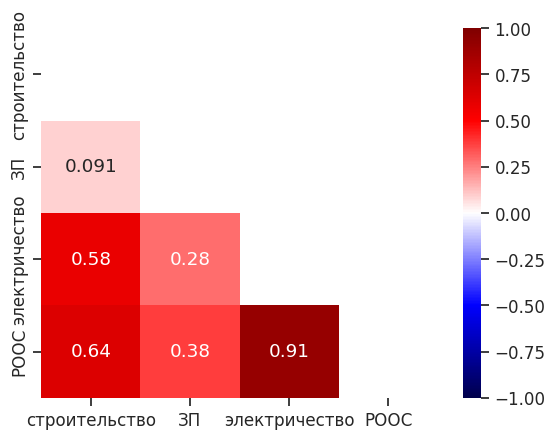

<Figure size 2000x1000 with 0 Axes>

In [ ]:
mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.set_style('ticks') 
sns.heatmap(data.corr(),mask=mask,vmin=-1,vmax=1,cmap='seismic',square=False,annot=True)
plt.figure(figsize=(20, 10))
plt.show()


**Вывод:**

Можно обратить внимание на высокий уровень положительной корреляции между показателем бедности и безработицы что является довольно логичным. Так же средневысокий показтель обратной корреляции у бедности и и урбанизации.

**Построим 3 типа диагарамм распределения по каждой связи показателей:**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

<Figure size 1400x1000 with 0 Axes>

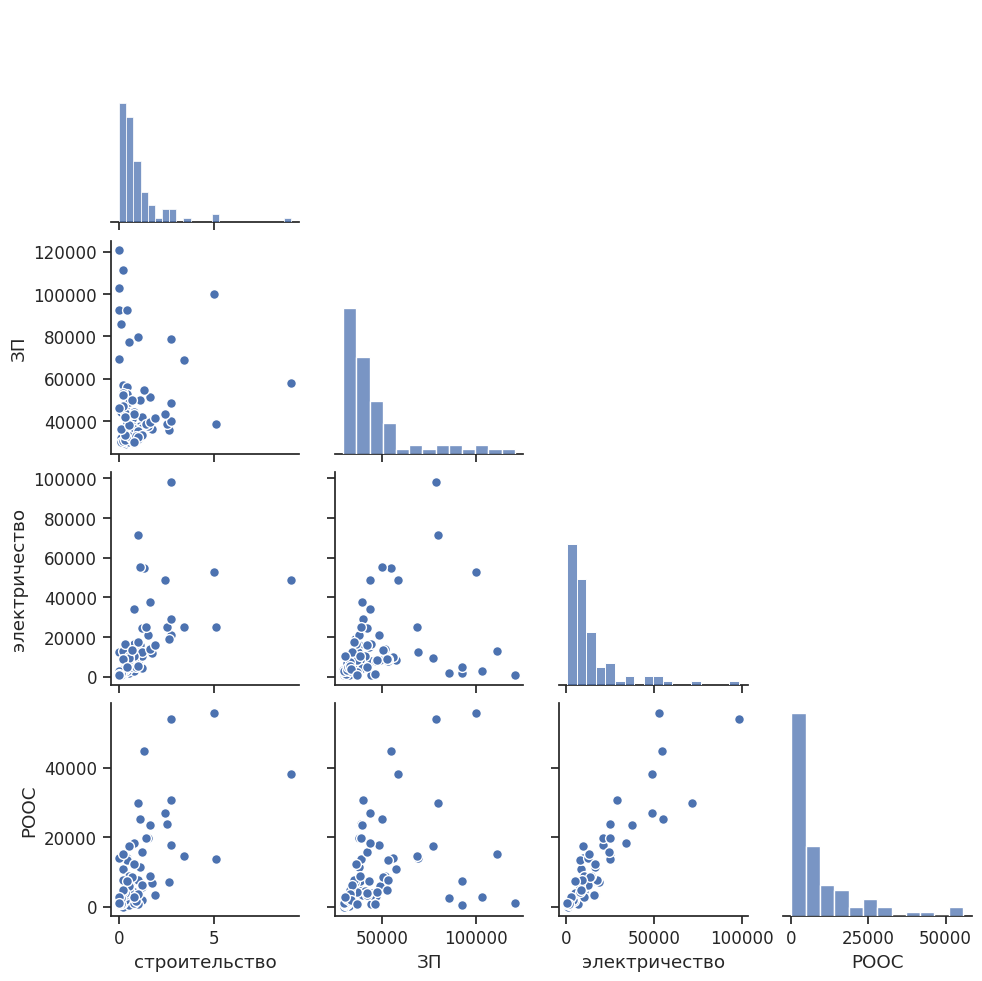

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout(pad=0)

sns.pairplot(data=data,corner=True,kind='scatter',palette ='Blues' , plot_kws=dict(s=50, edgecolor="white", linewidth=1))



In [ ]:
?sns.jointplot

<Figure size 100x100 with 0 Axes>

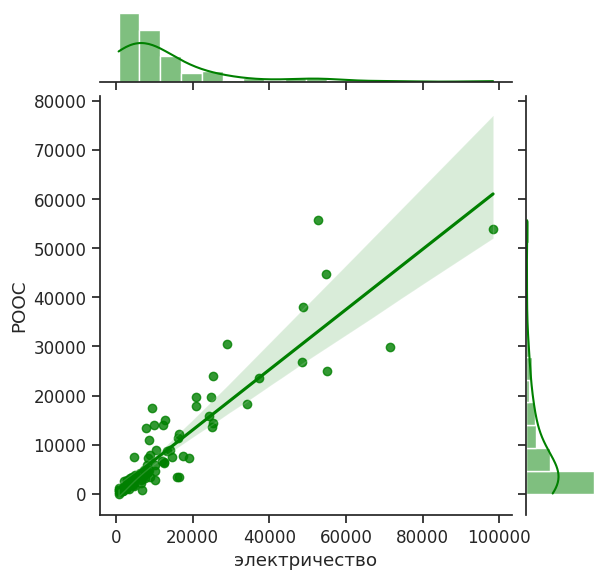

In [ ]:
fig=plt.figure(figsize=(1,1))
fig=sns.jointplot(x='электричество', y='РООС', data=data,kind='reg',color='green',palette='afthot') 

<Figure size 2000x1000 with 0 Axes>

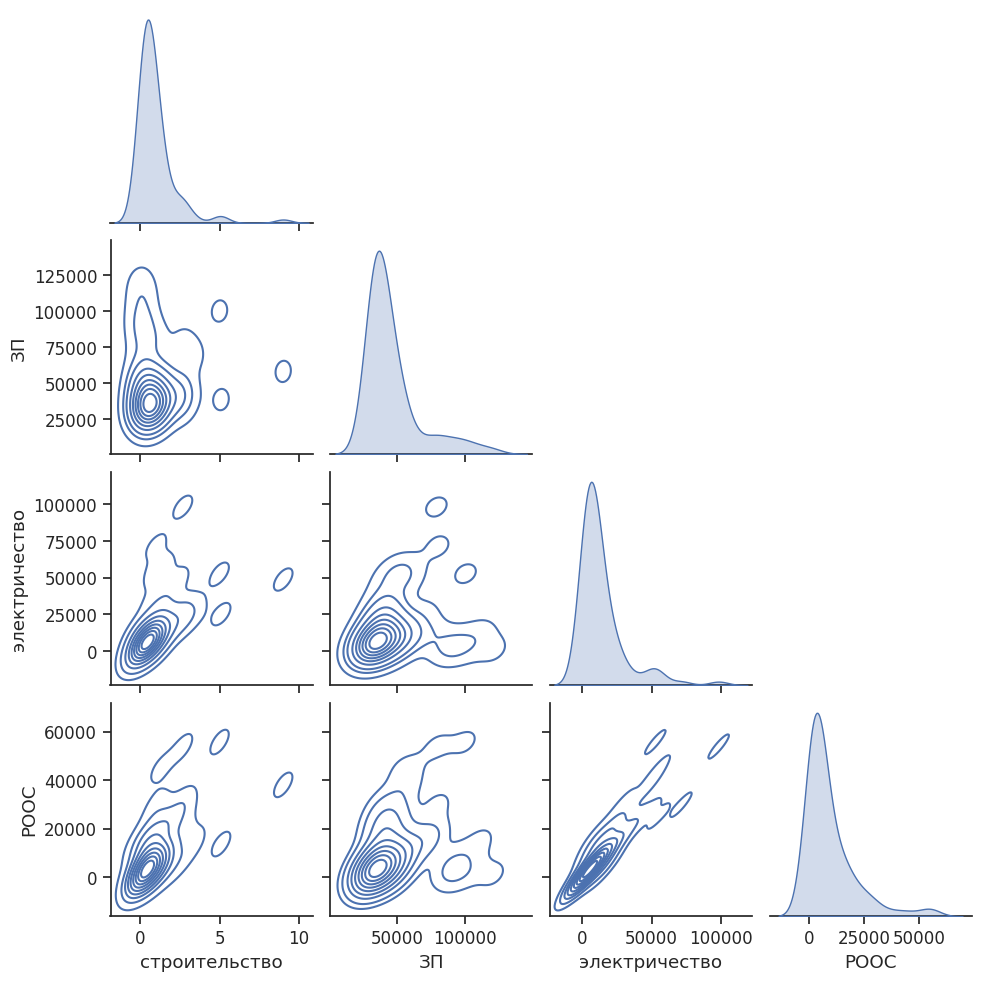

<Figure size 2000x1000 with 0 Axes>

In [ ]:
sns.pairplot(data=data,corner=True,kind='kde' )
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

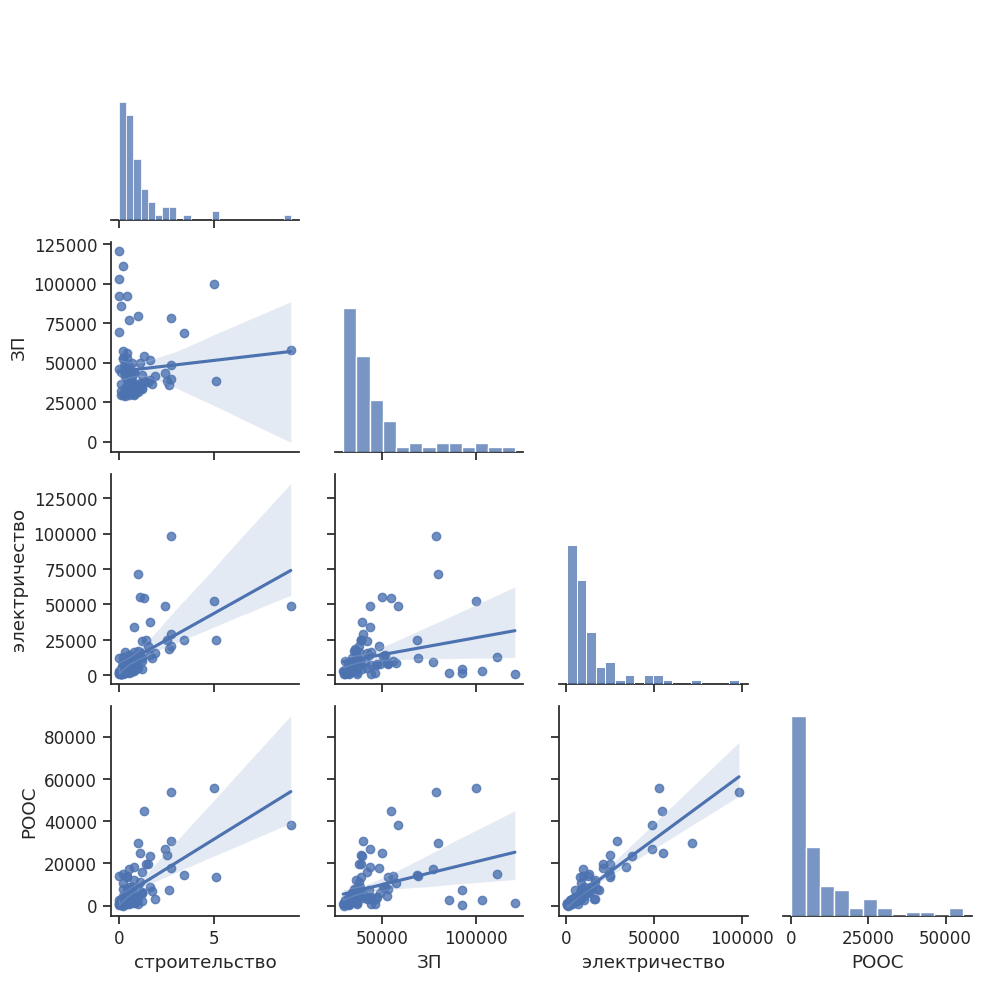

<Figure size 2000x1000 with 0 Axes>

In [ ]:
sns.pairplot(data=data,corner=True,kind='reg' )
plt.figure(figsize=(20, 10))

_______________________________________________________________________________________________________________

In [ ]:
cdf1=descr.loc[['min','max'],:]

In [ ]:
def cdf_type(classic_type):
  for x in data.columns:
    cdf1.loc['kstest_stat',x]=st.kstest(data[x],classic_type).statistic
    cdf1.loc['kstest_pvalue',x]=st.kstest(data[x],classic_type).pvalue
    cdf1.loc['cramer_stat',x]=st.cramervonmises(data[x],classic_type).statistic
    cdf1.loc['cramer_pvalue',x]=st.cramervonmises(data[x],classic_type).pvalue
  return cdf1

**1) Проведем тесты на нормальное распределение:**

In [ ]:
cdf_norm=cdf_type(classic_type='norm')
for x in data.columns:
  cdf_norm.loc['anderson_stat',x]=st.anderson(data[x],'norm').statistic
  cdf_norm.loc['Shapiro_stat',x]=st.shapiro(data[x])[0]
  cdf_norm.loc['Shapiro_pvalue',x]=st.shapiro(data[x])[1]
  cdf_norm.loc['mannwhitneyu',x]=st.mannwhitneyu(data[x],np.random.normal(loc=data[pok].mean(),scale=data[pok].std(),size=10000)).statistic
  cdf_norm.loc['mannwhitneyu',x]=st.mannwhitneyu(data[x],np.random.normal(loc=data[pok].mean(),scale=data[pok].std(),size=10000)).pvalue
  cdf_norm.loc['Studenttest',x]=st.ttest_ind(data[x],np.random.normal(loc=data[pok].mean(),scale=data[pok].std(),size=10000)).pvalue
cdf_norm


,строительство,ЗП,электричество,РООС
min,0.000,"29,083.000",688.600,63.000
max,9.000,"120,641.000","98,401.100","55,690.000"
kstest_stat,0.500,1.000,1.000,1.000
kstest_pvalue,0.000,0.000,0.000,0.000
cramer_stat,6.800,29.000,29.000,29.000
cramer_pvalue,0.000,0.000,0.000,0.000
anderson_stat,8.815,8.242,8.418,7.657
Shapiro_stat,0.623,0.731,0.690,0.721
Shapiro_pvalue,0.000,0.000,0.000,0.000
mannwhitneyu,0.000,0.000,0.322,0.212


In [ ]:

cdf111=descr.loc[['min','max'],:]
for x in data.columns:
  classic=np.random.normal(loc=data[x].mean(),scale=data[x].std(),size=10000)
  cdf111.loc['kstest_stat',x]=st.kstest(data[x],classic).statistic
  cdf111.loc['kstest_pvalue',x]=st.kstest(data[x],classic).pvalue
  #cdf111.loc['cramer_stat',x]=st.cramervonmises(data[x],classic)[0]
  #cdf111.loc['cramer_pvalue',x]=st.cramervonmises(data[x],classic).pvalue
  cdf111.loc['anderson_stat',x]=st.anderson(data[x],'norm').statistic
  cdf111.loc['Shapiro_stat',x]=st.shapiro(data[x])[0]
  cdf111.loc['Shapiro_pvalue',x]=st.shapiro(data[x])[1]
  cdf111.loc['mannwhitneyu',x]=st.mannwhitneyu(data[x],classic).statistic
  cdf111.loc['mannwhitneyu',x]=st.mannwhitneyu(data[x],classic).pvalue
  cdf111.loc['Studenttest',x]=st.ttest_ind(data[x],classic).pvalue
cdf111


,строительство,ЗП,электричество,РООС
min,0.000,"29,083.000",688.600,63.000
max,9.000,"120,641.000","98,401.100","55,690.000"
kstest_stat,0.239,0.221,0.229,0.227
kstest_pvalue,0.000,0.000,0.000,0.000
anderson_stat,8.815,8.242,8.418,7.657
Shapiro_stat,0.623,0.731,0.690,0.721
Shapiro_pvalue,0.000,0.000,0.000,0.000
mannwhitneyu,0.160,0.140,0.095,0.116
Studenttest,0.934,0.946,0.991,0.949


Тест Манна-Уитни данные по урбанизации проходят

**2) Построим тесты на экспоненциальное распределение:**

In [ ]:
cdf_type(classic_type='expon')

,строительство,ЗП,электричество,РООС
min,0.000,"29,083.000",688.600,63.000
max,9.000,"120,641.000","98,401.100","55,690.000"
kstest_stat,0.116,1.000,1.000,1.000
kstest_pvalue,0.178,0.000,0.000,0.000
cramer_stat,0.219,29.000,29.000,29.000
cramer_pvalue,0.233,0.000,0.000,0.000
anderson_stat,8.815,8.242,8.418,7.657
Shapiro_stat,0.623,0.731,0.690,0.721
Shapiro_pvalue,0.000,0.000,0.000,0.000
mannwhitneyu,0.000,0.000,0.322,0.212


**3) Построим тесты на логистическое распределение:**

In [ ]:
cdf_type(classic_type='logistic')

,строительство,ЗП,электричество,РООС
min,0.000,"29,083.000",688.600,63.000
max,9.000,"120,641.000","98,401.100","55,690.000"
kstest_stat,0.500,1.000,1.000,1.000
kstest_pvalue,0.000,0.000,0.000,0.000
cramer_stat,5.114,29.000,29.000,29.000
cramer_pvalue,0.000,0.000,0.000,0.000
anderson_stat,8.815,8.242,8.418,7.657
Shapiro_stat,0.623,0.731,0.690,0.721
Shapiro_pvalue,0.000,0.000,0.000,0.000
mannwhitneyu,0.000,0.000,0.322,0.212


In [ ]:
from matplotlib.ticker import NullFormatter, FormatStrFormatter,ScalarFormatter

<ipython-input-90-105984534543>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data[x],shade=True,label =x,linewidth =9,color='black',ax=plt.subplot(3,2,axn+1),legend=True,)
<ipython-input-90-105984534543>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data[x],shade=True,label =x,linewidth =9,color='black',ax=plt.subplot(3,2,axn+1),legend=True,)
<ipython-input-90-105984534543>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data[x],shade=True,label =x,linewidth =9,color='black',ax=plt.subplot(3,2,axn+1),legend=True,)
<ipython-input-90-105984534543>:12: FutureWarning: 

`shade` is now deprecated in favor 

<Figure size 640x480 with 0 Axes>

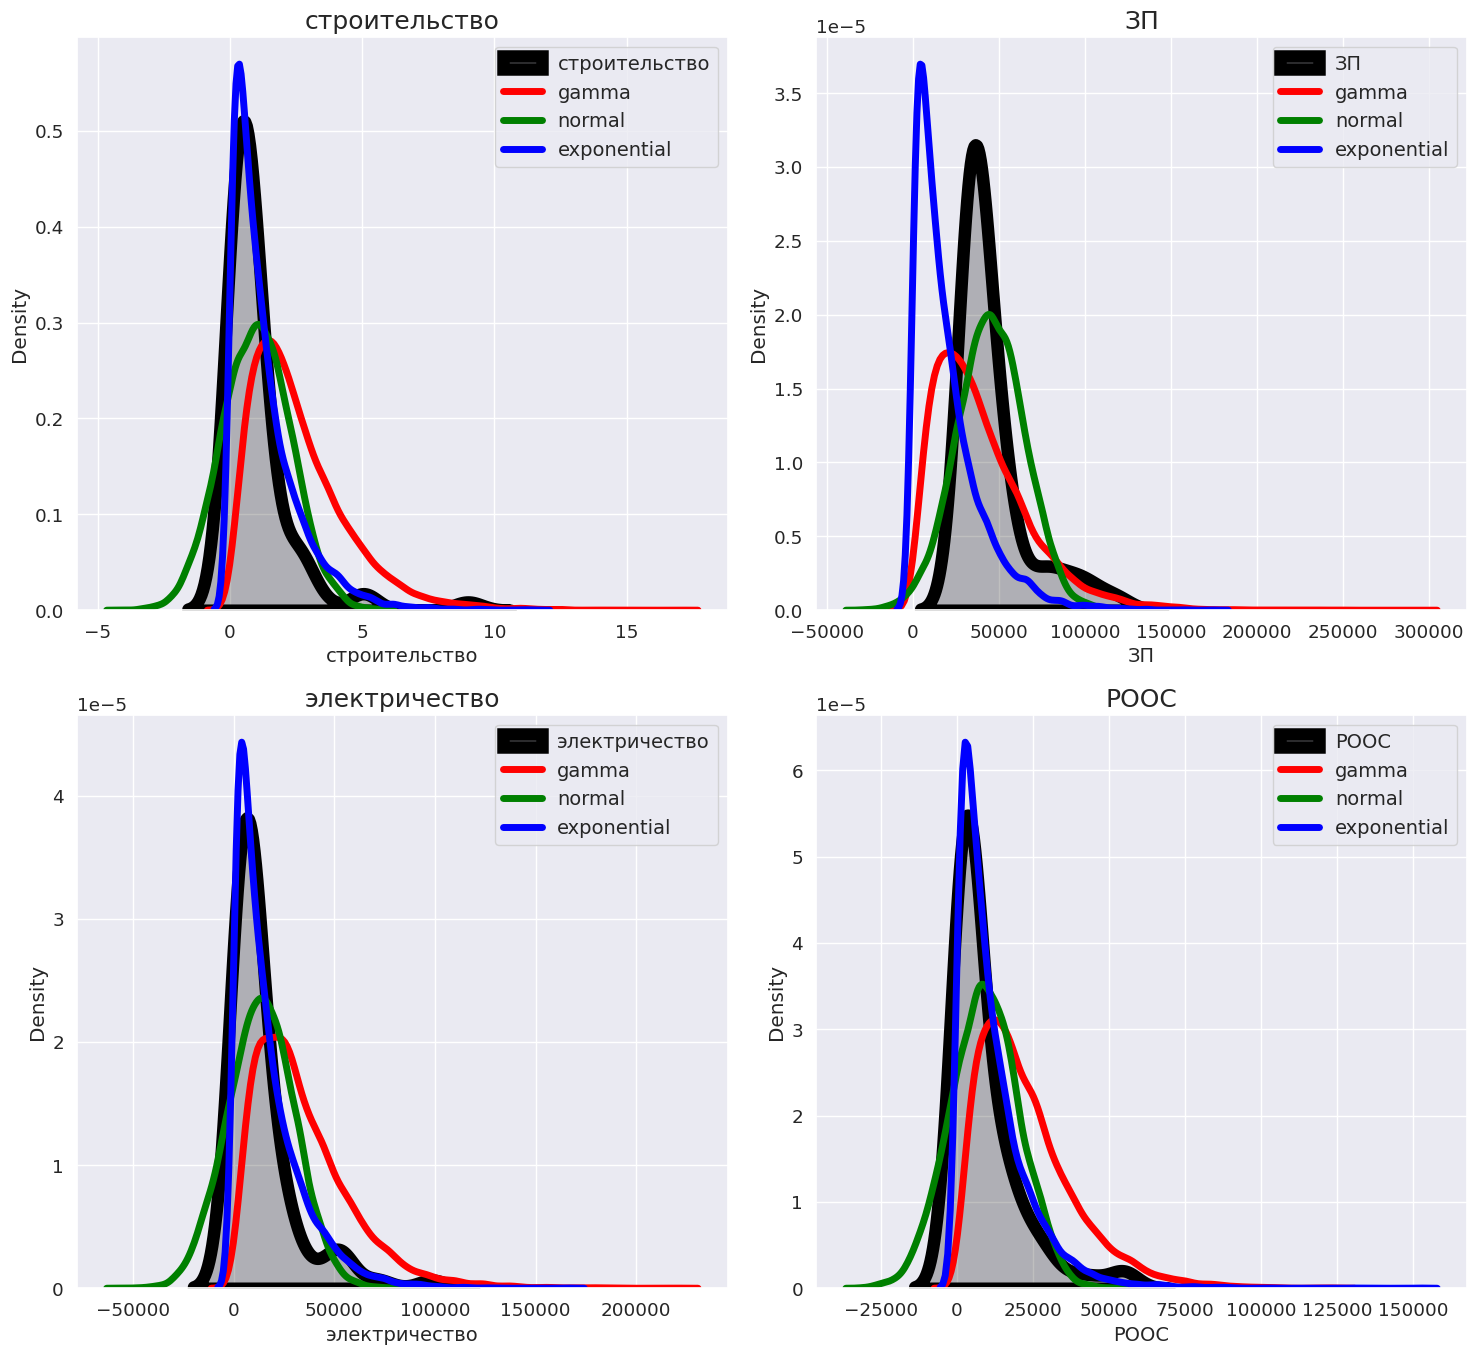

In [ ]:
sns.set_palette('coolwarm') 
sns.set_style('whitegrid') 
sns.set (font_scale= 1.2 )
plt.subplots_adjust(wspace=50, hspace=50)
plt.figure(figsize=(15, 20))
for x in data.columns:
  plt.tight_layout()
  axn=[i for i in range(0, len(data.columns)) if data.columns[i]==x][0]
  #sns.histplot(data = data, x=b, bins=13,ax=plt.subplot(3,2,axn+1),kde =True)
  

  ax=sns.kdeplot(data[x],shade=True,label =x,linewidth =9,color='black',ax=plt.subplot(3,2,axn+1),legend=True,)
  sf = ScalarFormatter()
  sf.set_powerlimits((-8, 10))
  plt.xlabel(x,fontsize=14)
  plt.title(x,fontsize=18)
  ax=sns.kdeplot(np.random.gamma(shape=2,scale=data[x].std(),size=10000),legend=True,label='gamma',linewidth =5
              ,color='red')
  ax=sns.kdeplot(np.random.normal(loc=data[x].mean(),scale=data[x].std(),size=10000),label='normal',linewidth =5
              ,color='green')
  ax=sns.kdeplot(np.random.exponential(scale=data[x].std(),size=10000),label='exponential',linewidth =5,color='blue')
  #ax=sns.kdeplot(data[x],shade=True,label =x,linewidth =7,color='black',ax=plt.subplot(3,2,axn+1),legend=True)
  plt.legend(fontsize=14)
  


In [ ]:
np.arange(2,6)

array([2, 3, 4, 5])

In [ ]:

s.round()

array([5., 3., 5., ..., 4., 6., 4.])

In [ ]:
s = -3+np.random.weibull(6, 10000)*7
s=s.round()
s=s[np.where(s<=5)]
s=s[np.where(s>=2)]
s.value_counts()

AttributeError: ignored

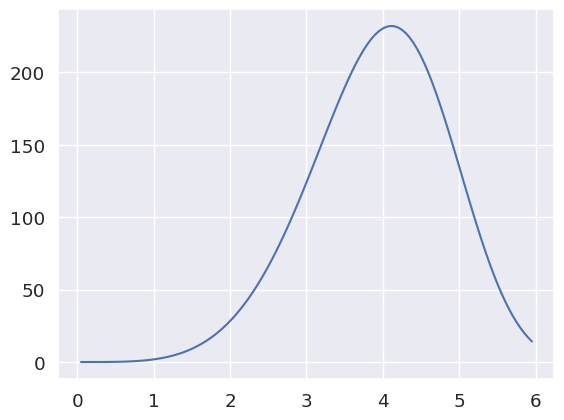

In [ ]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)
x = np.arange(1,120.)/20.
scale = count.max()/weib(x, 4.3, 5.).max()
plt.plot(x, weib(x, 4.3, 5.)*scale)
plt.show()

In [ ]:
scale = count.max()/weib(y, 4.3, 5.).max()
scale

534.7266921660478

In [ ]:
y=np.arange(2,6)
weib(y, 4.3, 5.)*scale

array([ 28.47253176, 124.86973646, 232.        , 135.6586713 ])

In [ ]:
def distribution(X):
  plt.figsize=(14,10)
  sns.kdeplot(data[X],shade=True,label =x,linewidth =3,color='black')
  sns.kdeplot(np.random.gamma(shape=2,scale=data[X].std(),size=10000),legend=True,label='gamma',linewidth =3
              ,color='red')
  sns.kdeplot(np.random.normal(loc=data[X].mean(),scale=data[X].std(),size=10000),label='normal',linewidth =3
              ,color='green')
  sns.kdeplot(np.random.exponential(scale=data[X].std(),size=10000),label='exponential',linewidth =3,color='blue')
  sns.color_palette("pastel")
  plt.ylabel

  #sns.kdeplot(np.random.lognormal(sigma =1,mean=data[X].mean(),size=10000),label='lognormal',linewidth =3)
  #sns.kdeplot(np.random.weibull(a=1,size=10000),label='weibull',linewidth =3) 
  plt.legend()
  plt.figsize=(14,28)
  plt.show()


_______________________________________________________________________________________________________________

**Построим графики распределения НАШИХ показателей с некоторыми станадартными распределениями:**

<ipython-input-48-2b0eb007f511>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[X],shade=True,label =x,linewidth =3,color='black')


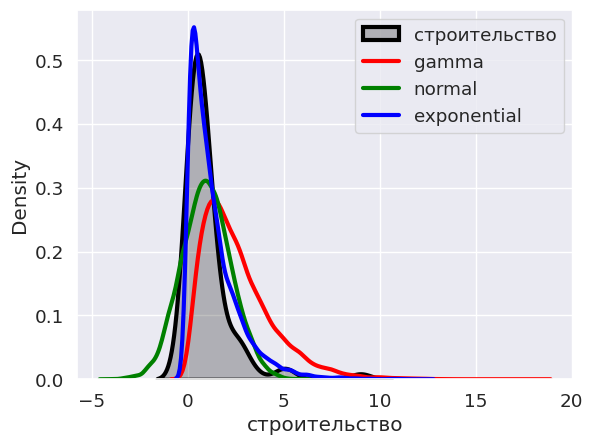

<ipython-input-48-2b0eb007f511>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[X],shade=True,label =x,linewidth =3,color='black')


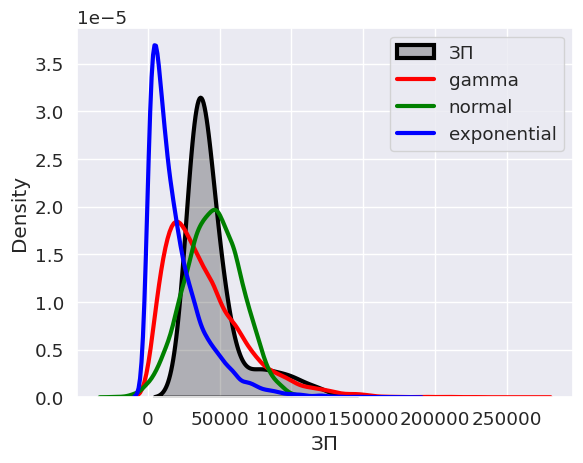

<ipython-input-48-2b0eb007f511>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[X],shade=True,label =x,linewidth =3,color='black')


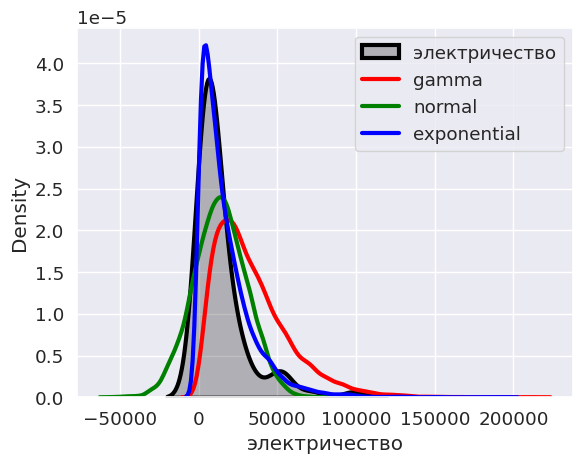

<ipython-input-48-2b0eb007f511>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[X],shade=True,label =x,linewidth =3,color='black')


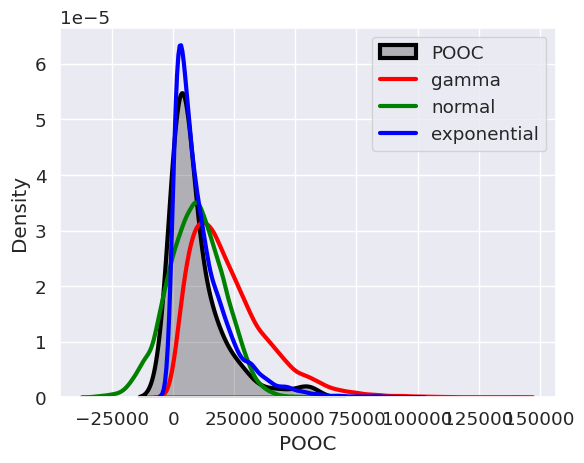

In [ ]:
for x in data.columns:
  distribution(x)

_______________________________________________________________________________________________________________

Линейная регрессия — это метод, который мы можем использовать для понимания взаимосвязи между одной или несколькими предикторными переменными и переменной отклика.

Используем функцию OLS() из библиотеки statsmodels для выполнения регрессии методом наименьших квадратов, используя "уровень безработицы", "индекс Джини" и "уровень урбанизаци" в качестве переменных-предикторов и "уровень бедности" в качестве переменной ответа:

In [ ]:
import statsmodels.api as sm

#define response variable
y = data[pok]

#define predictor variables
x = data[data.columns.drop(pok)]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   РООС   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     173.4
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.21e-35
Time:                        16:32:24   Log-Likelihood:                -849.40
No. Observations:                  87   AIC:                             1707.
Df Residuals:                      83   BIC:                             1717.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3362.4083   1193.619     -2.817

In [ ]:
data.columns

Index(['строительство', 'ЗП', 'электричество', 'РООС'], dtype='object')

In [ ]:
print(data.columns[0],data.columns[1],data.columns[2],data.columns[3])

строительство ЗП электричество РООС


**R-квадрат: 0,832.Это коэффициент детерминации.** Это доля дисперсии переменной отклика, которая может быть объяснена переменными-предикторами (факторами). В этом примере около 83% вариаций результатов ожидаемой продолжительности жизни враженной в годах можно объяснить уровнем рождаемости и смертности, а также заработной платы и % трат государства на медицину.

**F-статистика: 165.Это общая F-статистика для регрессионной модели.**

**Вероятность (F-статистика): 1.54e-50.** Это p-значение, связанное с общей F-статистикой. Он говорит нам, является ли регрессионная модель в целом статистически значимой. Другими словами, он говорит нам, имеют ли объединенные две предикторные переменные статистически значимую связь с переменной отклика. В этом случае p-значение в разы меньше 0,05, что указывает на то, что переменные-предикторы (факторы) уровня рождаемости и смертности, а также заработной платы и  % трат государства на медицину в совокупности имеют статистически значимую связь c ожидаемой продолжительностью жизни.

**coef:** коэффициенты для каждой переменной-предиктора (фактор) говорят нам о среднем ожидаемом изменении переменной отклика, предполагая, что другая переменная-предиктор остается постоянной. Например, ожидается, что за каждую дополнительный 1 % изменения уровня смертности, средний % ожидаемой продолжительности жизни изменится на **-0,8** при условии, что уровнень рождаемости, заработной платы и  % трат государства на медицины остнуться неизменными.

Мы интерпретируем коэффициент для перехвата как означающий, что ожидаемая продолжительность жизни, при значении факторов равное нулю, составляет 86 %.

**Р>|т|**. Отдельные p-значения говорят нам, является ли каждая предикторная переменная статистически значимой. Мы видим, что уровнь рождаемости и смертности, а также размер заработной платы и  % трат государств статистически значимы (p = 0,00). Мы не можем исключить ничего из модели.

Расчетное уравнение регрессии: мы можем использовать коэффициенты из выходных данных модели, чтобы создать следующее расчетное уравнение регрессии:

**ОПЖ = 86 - 0,59* (рождаемость) + 0,0013 (ЗП) - 0,8* (смертность) + 0.4* (%_медицины)**

Мы можем использовать это оценочное уравнение регрессии, чтобы рассчитать ожидаемую продолжительность жизни на основе уровня рождаемости и смертности, а также заработной платы и  % трат государства на медицину.


**Остаточные графики для линейной регрессии:**

Мы подгоняем модель множественной линейной регрессии, используя уровень безработицы, индекс Джини и уровень урбанизаци в качестве переменной-предиктора и бедность в качестве переменной-ответа:

In [ ]:
data.columns.drop(pok)

Index(['строительство', 'ЗП', 'электричество'], dtype='object')

eval_env: 1
eval_env: 1
eval_env: 1


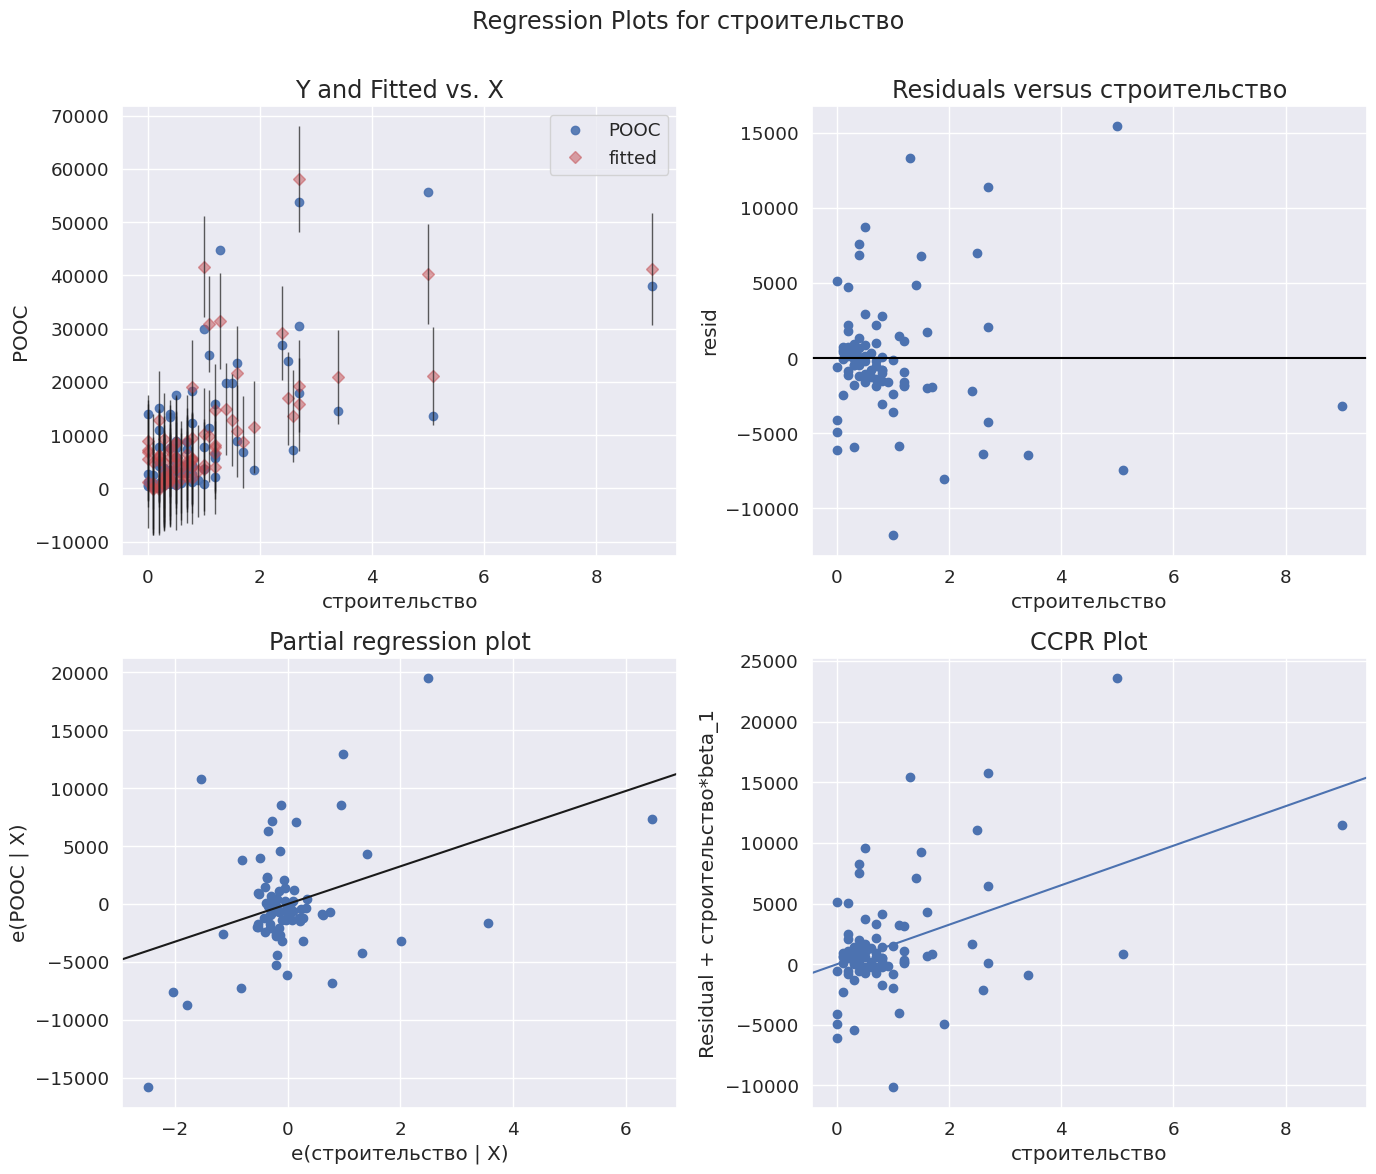

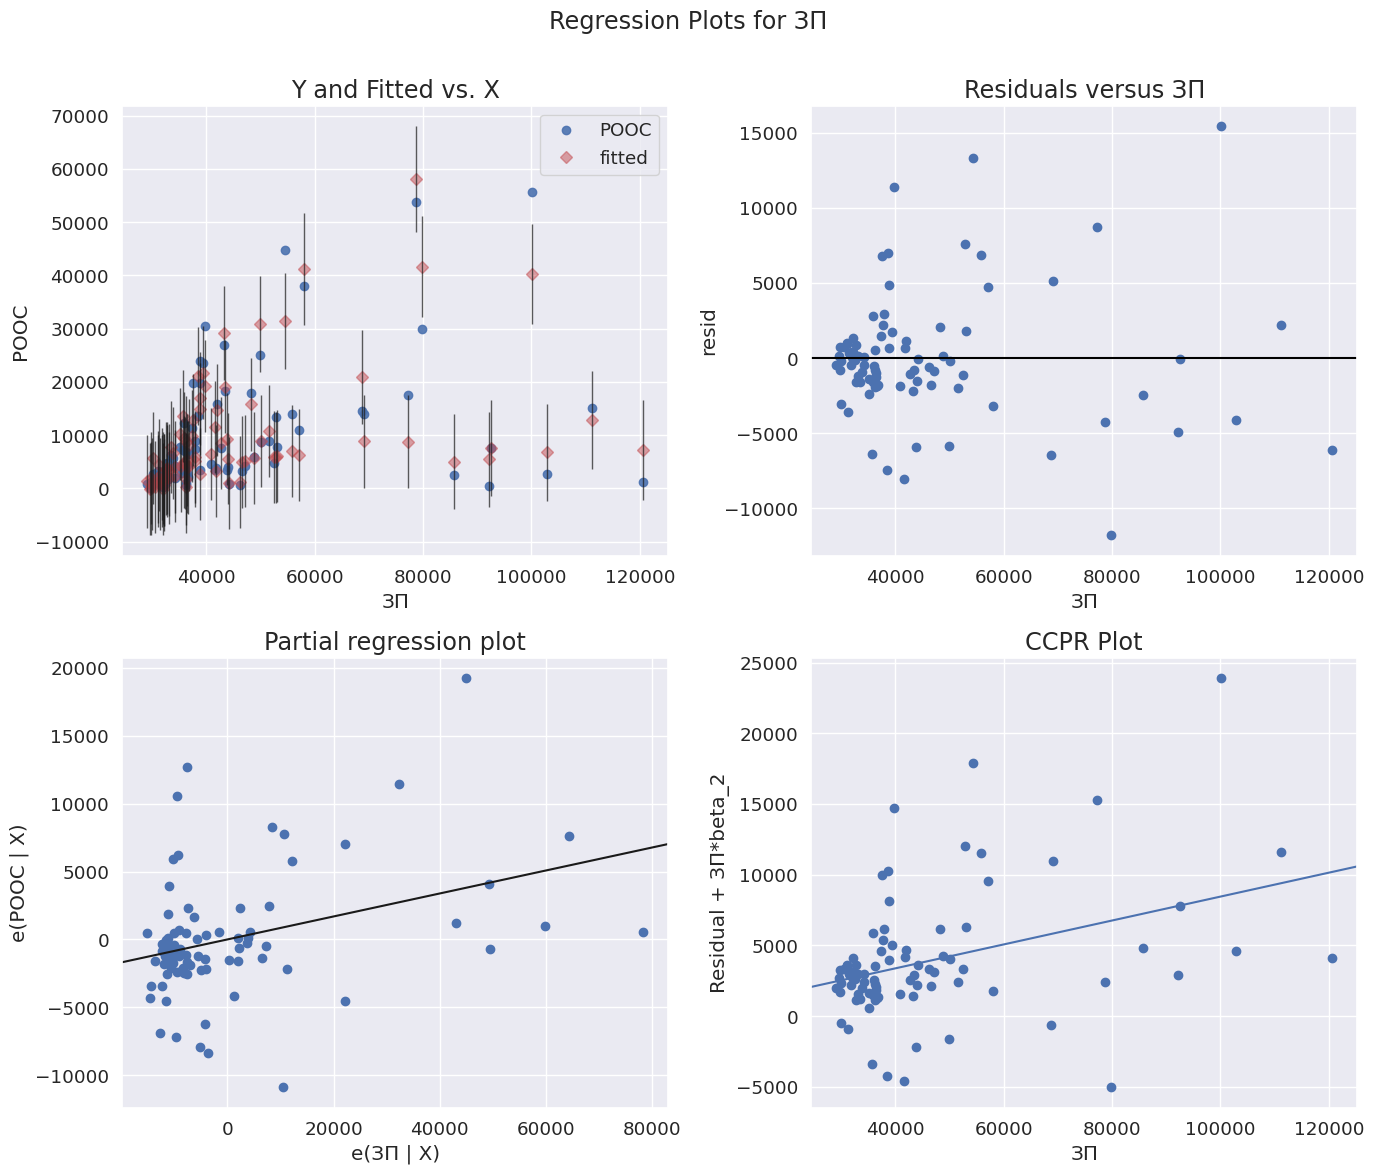

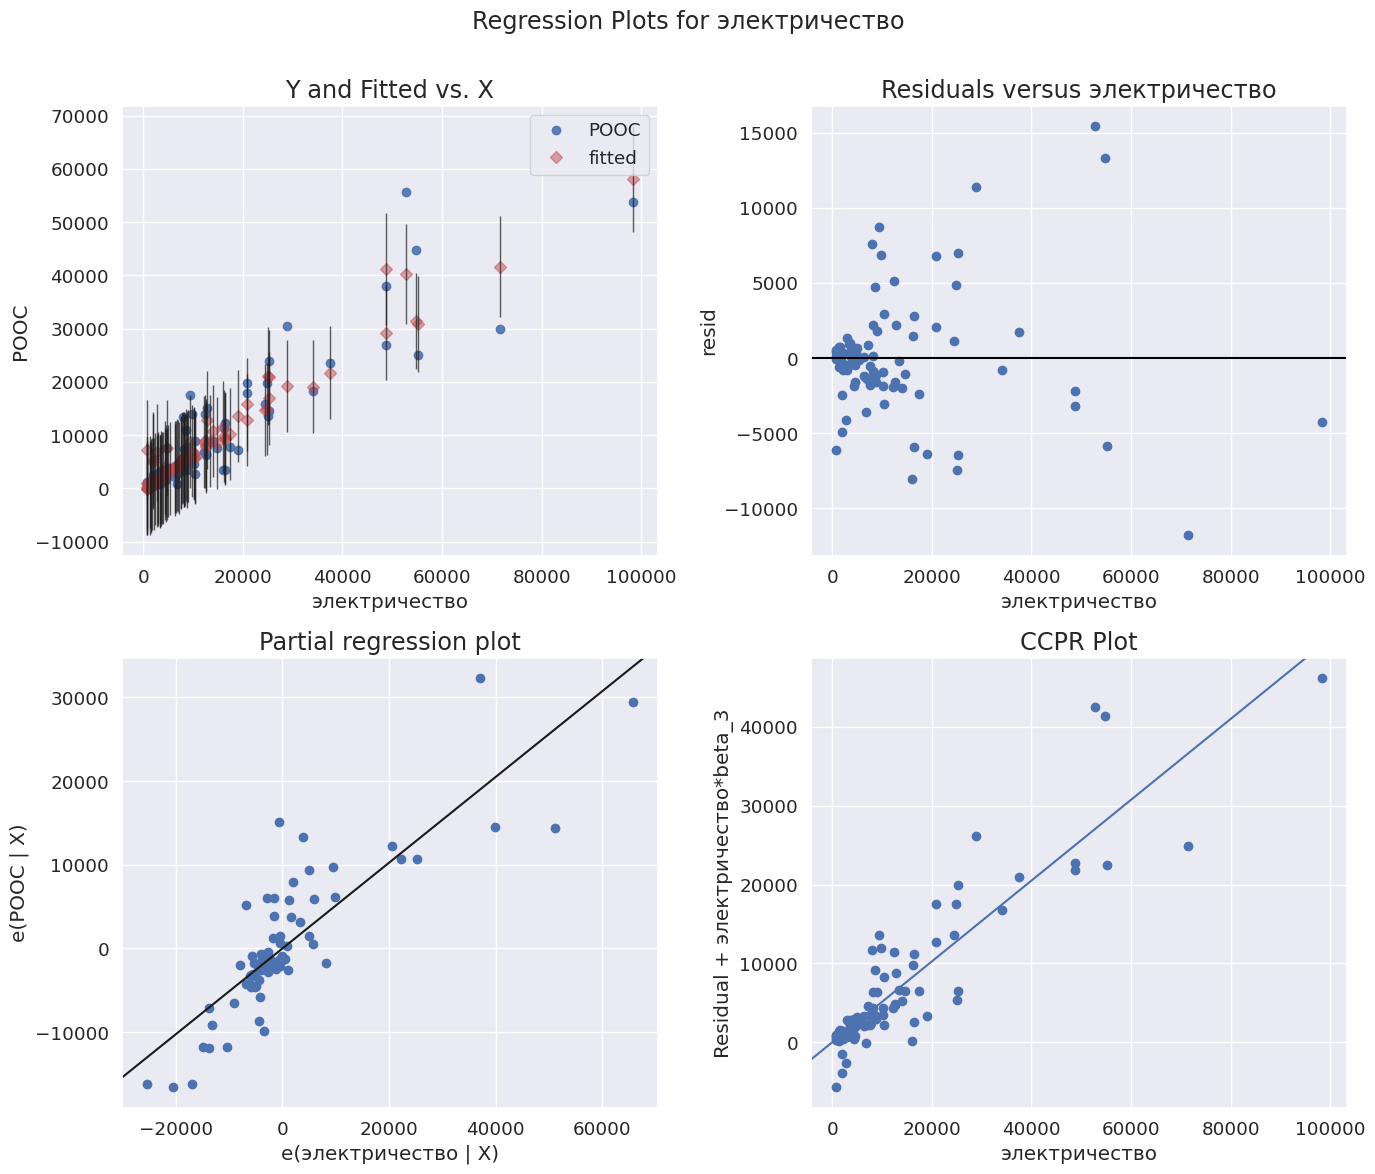

In [ ]:
for x in data.columns.drop(pok):
  fig = plt.figure(figsize=(14,12))
  fig = sm.graphics.plot_regress_exog(model, x, fig=fig)

1) https://www.codecamp.ru/blog/linear-regression-python/

2) https://www.codecamp.ru/blog/residual-plot-python/

3) https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html

4) http://statsoft.ru/home/textbook/modules/stbasic.html#Descriptive%20statisticsa

5) https://www.codecamp.ru/blog/normality-test-python/#:~:text=(%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4)%20%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%B9%D1%82%D0%B5%20%D0%B3%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D1%83.,%D1%81%D1%87%D0%B8%D1%82%D0%B0%D0%B5%D1%82%D1%81%D1%8F%2C%20%D1%87%D1%82%D0%BE%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D1%8B%20%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE.

6) https://www.codecamp.ru/blog/linear-regression-python/

7) https://www.codecamp.ru/blog/linear-regression-python/

8) https://www.codecamp.ru/blog/linear-regression-python/

9) https://www.codecamp.ru/blog/linear-regression-python/

10) https://www.codecamp.ru/blog/linear-regression-python/

11) https://www.codecamp.ru/blog/linear-regression-python/

12) https://www.codecamp.ru/blog/linear-regression-python/

13) https://www.codecamp.ru/blog/linear-regression-python/

14) https://www.codecamp.ru/blog/linear-regression-python/

15) https://www.codecamp.ru/blog/linear-regression-python/

16) https://www.codecamp.ru/blog/linear-regression-python/

17) https://www.codecamp.ru/blog/linear-regression-python/

18) https://www.codecamp.ru/blog/linear-regression-python/

19) https://www.codecamp.ru/blog/linear-regression-python/

20) https://www.codecamp.ru/blog/linear-regression-python/


In [ ]:
data.columns

Index(['строительство', 'ЗП', 'электричество', 'РООС'], dtype='object')

In [ ]:
import statsmodels.api as sm

#define response variable
y = data[pok]

#define predictor variables
x = data[data.columns.drop(pok)]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   РООС   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     173.4
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.21e-35
Time:                        16:32:28   Log-Likelihood:                -849.40
No. Observations:                  87   AIC:                             1707.
Df Residuals:                      83   BIC:                             1717.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3362.4083   1193.619     -2.817